In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from visualization_functions import (
    plot_2d_iterates_contours,
    plot_f_val_diffs,
    plot_step_sizes,
    plot_grad_norms,
)
from gradient_descent_UP import gradient_descent_UP
from rand_problem import rand_problem
from example_functions import rosenbrock

In [43]:
a = 1
b = 100
rosenbrock_f = lambda x: rosenbrock(a, b, x)[0]
rosenbrock_prime = lambda x: rosenbrock(a, b, x)[1]

rosenbrock_histories = []
rosenbrock_labels = []
configurations = [([2,2], 1e-2, .01, 0.5), ([2,2.5], 1e-2, .1, 0.5), ([2.5,2], 1e-4, .01, 0.5), ([2.5,2.5], 1e-4, .1, 0.5)]
for configuration in configurations:
    rosenbrock_histories.append(
        gradient_descent_UP(
            configuration[0],
            rosenbrock_f,
            rosenbrock_prime,
            np.identity(2),
            sigma=configuration[1],
            alpha_lower_bound=configuration[2],
            beta=configuration[3],
            max_iter=100,
        )
    )
    rosenbrock_labels.append(f"x0: {configuration[0]}, sigma: {configuration[1]}, alpha: {configuration[2]}, beta: {configuration[3]}")


0


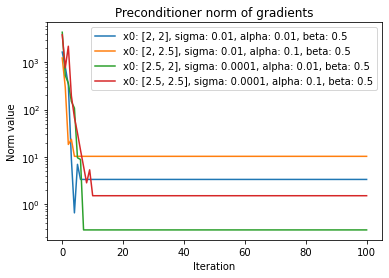

In [44]:
plot_grad_norms(
    histories=rosenbrock_histories,
    labels=rosenbrock_labels,
)
print(0)

0


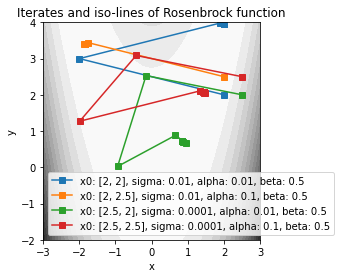

In [46]:
plot_2d_iterates_contours(
    rosenbrock_f,
    histories=rosenbrock_histories,
    labels=rosenbrock_labels,
    xlims=[-3, 3],
    ylims=[-2,4],
    title="Iterates and iso-lines of Rosenbrock function"
)
print(0)

In [95]:
N = 10
problems = []

for i in range(N):
    problems.append(rand_problem(2))

# normalize norm of random start point
for problem in problems:
    problem.x0 = problem.x0 * (np.linalg.norm(problem.x0)) ** (-1)

histories = []
# labels = []
for problem in problems:
    histories.append(
        gradient_descent_UP(
            problem.x0,
            problem.f,
            problem.f_prime,
            problem.Pinv,
            sigma=1e-3,
            alpha_lower_bound=10,
            beta=0.5,
            #beta_upper=0.9,
        )
    )

0


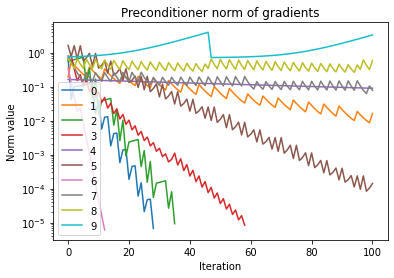

In [96]:
plot_grad_norms(
   histories=histories, labels=range(len(histories))
)  # Gradient norms - gradient descent algorithm
print(0)

0


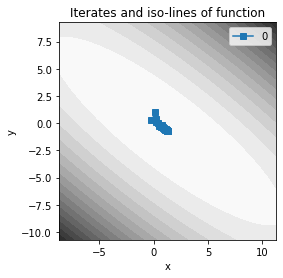

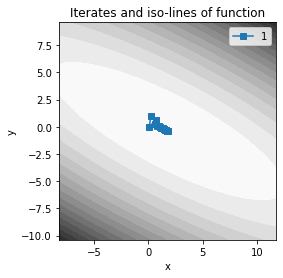

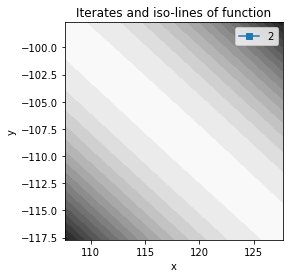

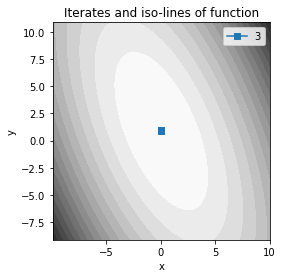

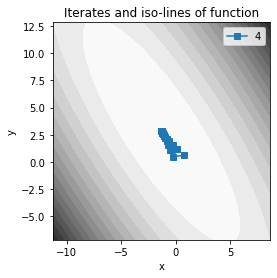

In [83]:
for i, problem in enumerate(problems):
    center = np.linalg.solve(problem.A, problem.b),
    center = list(center)[0]
    plot_2d_iterates_contours(
        problem.f,
        histories=[histories[i]],
        labels=[str(i)],
        xlims = [center[0] - 10, center[0] + 10],
        ylims = [center[1] - 10, center[1] + 10],
    )
print(0)